<h2 style = "margin: 5px;"> CARAGAY, JOHN RUSSELL A. </h2>
<h2 style = "margin: 5px;"> ESCABARTE, KAREN C. </h2>

<h2 style = "text-align: center;">Midterm Exam - Group 6 </h2>

#### Importing Necessary Libraries

In [1]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
#Importing HTML and CSS to Make the Output Align in Center.
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

#### Importing the Testing Image

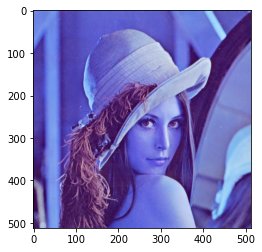

In [3]:
test_img = cv2.imread('lenna.png')
plt.imshow(test_img)

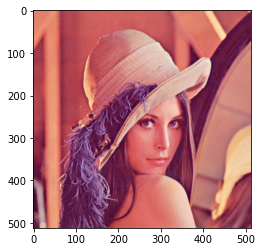

In [4]:
#Since the default color in opencv is BGR, we changed the color to RGB.
image = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# GENERATING COLOR PALETTE 

In [5]:
#This function is used to convert the rgb color to hexadecimal.
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [6]:
#This function is used to reshape and resize the image for color processing.
def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

In [7]:
#Using K-Means to identify the top colors of the image.
def color_analysis(img):
    #The n_clusters will generate the number of top colors. It can be changed to any desired number.
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (13, 5))
    plt.title("Color Palette")
    return plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

In [8]:
#This function is used to call and create the pie chart.
def color_palette (img):
    modified_image = prep_image(img)
    color = color_analysis(modified_image)
    return color

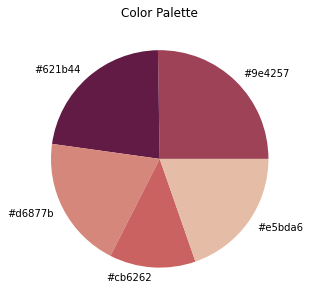

In [9]:
#This code will call the color_palette function and will send the image to get the pie chart of 
#top colors.
color_palette(image)
plt.show()

## GRAYSCALE FILTER

In [10]:
#This function is used to convert the original image to grayscale.
def grayscale (img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    return cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)

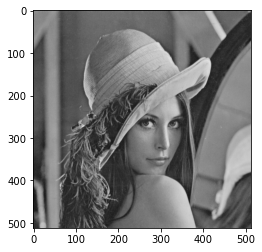

In [11]:
#Calling the grayscale function by sending the original image.
grayscale_test = grayscale(image)
plt.imshow(grayscale_test)

## DETAIL ENHANCEMENT
#### SIGMA_S = SMOOTH_SCALE (values: 0-200) 
#### SIGMA_R = EDGE_SCALE (values: 0-1)

In [12]:
#This function is used to enhance the original image.
def enhance (img,smooth_scale,edge_scale):
    enhance_img = cv2.detailEnhance(img, sigma_s = edge_scale, sigma_r = edge_scale)
    return enhance_img

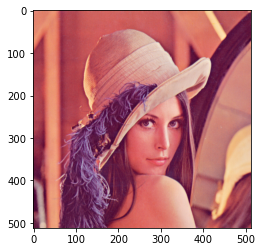

In [13]:
#Calling the enhance function, and specifying the smoothness,and the desired edge scale for the image.
enhance_test1 = enhance(image,10,0.12)
plt.imshow(enhance_test1)

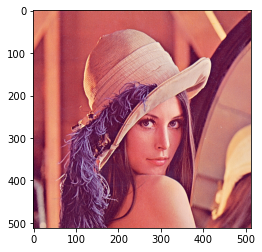

In [14]:
#Using different smoothness and edge scale.
enhance_test2 = enhance(image,200,1)
plt.imshow(enhance_test2)

## PENCILSKETCH FILTER
#### SIGMA_S = SMOOTH_SCALE (values: 0-200) 
#### SIGMA_R = EDGE_SCALE (values: 0-1) 
#### SHADE_FACTOR = SHADE (values:0-0.1)

In [15]:
#Creating two separate functions for each option.

#Function that returns gray pencilsketch.
def pen_sketch_gray (img,smooth_scale,edge_scale,shade):
    pen_gray, pen_color =  cv2.pencilSketch(img, sigma_s=smooth_scale, sigma_r=edge_scale, shade_factor=shade)
    return cv2.cvtColor(pen_gray, cv2.COLOR_BGR2RGB)

#Function that returns colored pencilsketch.
def pen_sketch_colored (img,smooth_scale,edge_scale,shade):
    pen_gray, pen_color =  cv2.pencilSketch(img, sigma_s=smooth_scale, sigma_r=edge_scale, shade_factor=shade)
    return pen_color  

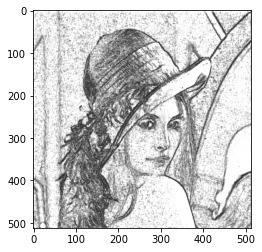

In [16]:
#Calling the function that will return uncolored pencil sketch.
pensketch_test1 = pen_sketch_gray(image,60,0.07,0.1)
plt.imshow(pensketch_test1)

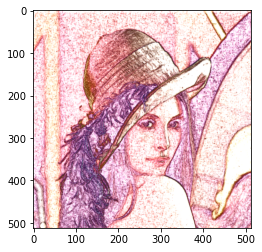

In [17]:
#Testing the colored pencil sketch functions.
pensketch_test2 = pen_sketch_colored(image,60,0.07,0.1)
plt.imshow(pensketch_test2)

## BRIGHTNESS
#### BETA = BRIGHTNESS_VALUE (negative and positive values)

In [18]:
# brightness adjustment using cv2.convertScaleAbs() function.
# The beta Value will indicate if the image will be brighter or darker.
def bright(img, brightness_value):
    image_to_bright = cv2.convertScaleAbs(img, beta=brightness_value)
    return image_to_bright

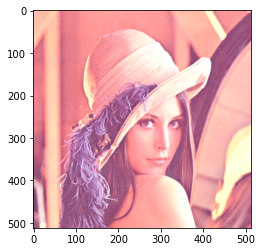

In [19]:
# positive beta value (brighter image).
bright_test1 = bright(image, 60)
plt.imshow(bright_test1)

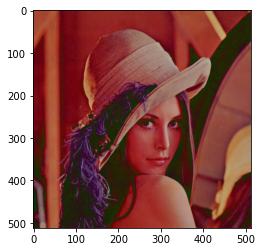

In [20]:
# negative beta value (darker image).
bright_test2 = bright(image, -60)
plt.imshow(bright_test2)

## INVERT FILTER

In [21]:
# invert filter using cv2.bitwise_not().
# This invert filter means inverting the pixel values by subtracting the 
# pixel by 255 or use the bitwsie function.
def invert(img):
    convert_to_invertFilter = cv2.bitwise_not(img)
    return convert_to_invertFilter

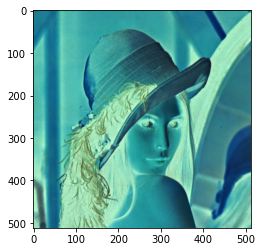

In [22]:
#Calling the function to invert the image color.
invert_test = invert(image)
plt.imshow(invert_test)

<h1 style = "text-align: center;">SUMMARY </h1> 

### SUMMARY OF TESTINGS:

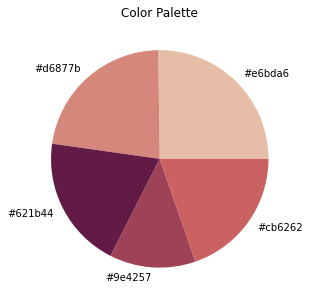

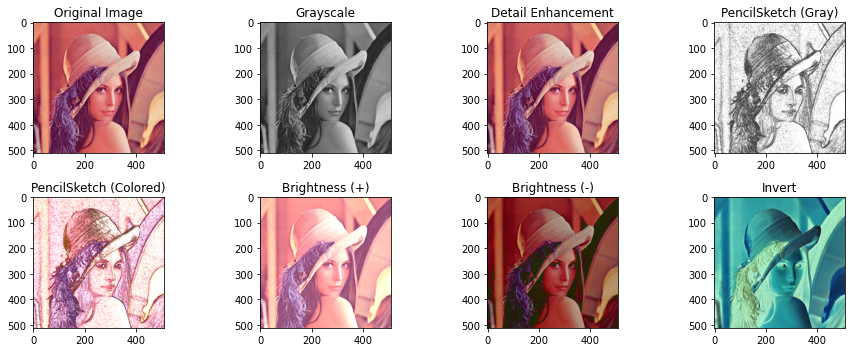

In [23]:
#Calling the color pallette generator
color_palette(image)

#Titles for each plot
titles = ['Original Image',"Grayscale","Detail Enhancement","PencilSketch (Gray)","PencilSketch (Colored)","Brightness (+)","Brightness (-)","Invert"]

#The plots created earlier are added inside the list
images = [image, grayscale_test, enhance_test1, pensketch_test1, pensketch_test2, bright_test1, bright_test2, invert_test]

#Specifying the figure size
plt.figure(figsize=(13,5))

#Loop for calling all the plots in the list
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])

#Used to automaticallly adjust the subplots
plt.tight_layout()

#Showing all the plots
plt.show()

<h1 style = "text-align: center;">TESTING OTHER IMAGE </h1> 

### TEST 1

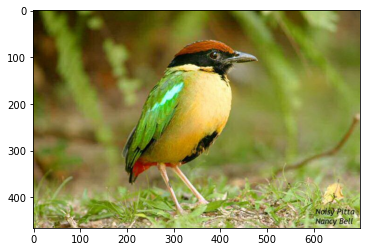

In [24]:
#Importing the first image that will be tested
new_img = cv2.imread('bird.jpeg')

#changing the color from bgr to rgb
image = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
plt.imshow(image)

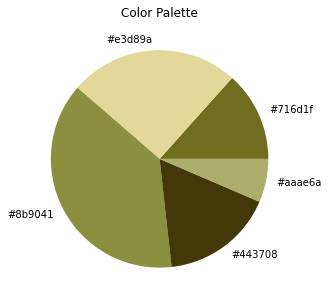

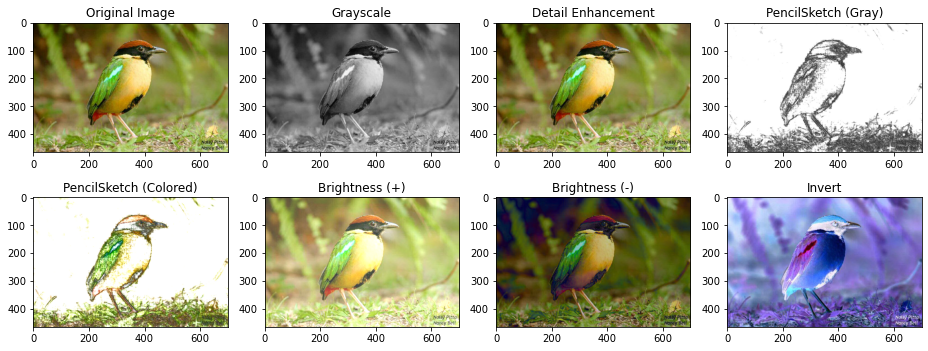

In [25]:
#Calling the functions that created in the previous cells. Values of some parameters can be changed based on your own desires.
#Filters range can be changed here.
grayscale_img = grayscale(image)
enhance_img = enhance(image,10,0.12)
pensketch_gray = pen_sketch_gray(image,90,0.07,0.1)
pensketch_colored = pen_sketch_colored(image,60,0.07,0.1)
bright_posimg = bright(image, 60)
bright_negimg = bright(image, -60)
invert_img = invert(image)

#Calling the color pallette generator
color_palette(image)

#Titles for each plot
titles = ['Original Image',"Grayscale","Detail Enhancement","PencilSketch (Gray)","PencilSketch (Colored)","Brightness (+)","Brightness (-)","Invert"]

#The plots created earlier are added inside the list
images = [image, grayscale_img, enhance_img, pensketch_gray, pensketch_colored, bright_posimg,bright_negimg, invert_img]

#Specifying the figure size
plt.figure(figsize=(13,5))

#Loop for calling all the plots in the list
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])

#Used to automaticallly adjust the subplots
plt.tight_layout()

#Showing all the plots
plt.show()

### TEST 2

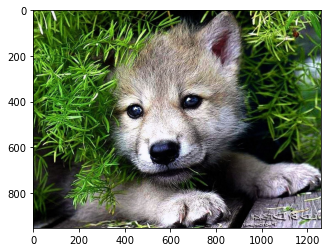

In [26]:
#Importing the second image that will be tested
new_img = cv2.imread('wolf.jpg')

#changing the color from bgr to rgb
image = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
plt.imshow(image)

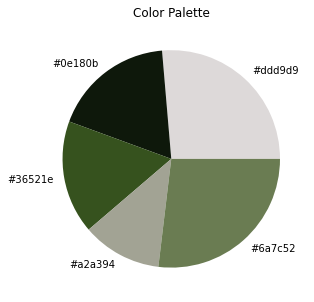

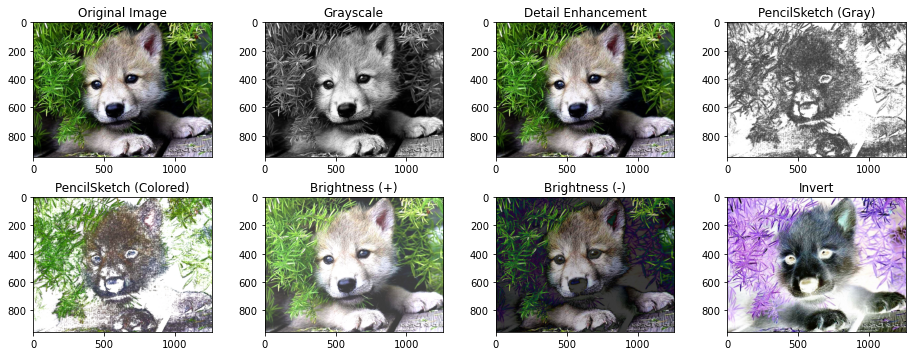

In [27]:
#Calling the functions that created in the previous cells. Values of some parameters can be changed based on your own desires.
#Filters range can be changed here.
grayscale_img = grayscale(image)
enhance_img = enhance(image,10,0.12)
pensketch_gray = pen_sketch_gray(image,90,0.07,0.1)
pensketch_colored = pen_sketch_colored(image,60,0.07,0.1)
bright_posimg = bright(image, 60)
bright_negimg = bright(image, -60)
invert_img = invert(image)

#Calling the color pallette generator
color_palette(image)

#Titles for each plot
titles = ['Original Image',"Grayscale","Detail Enhancement","PencilSketch (Gray)","PencilSketch (Colored)","Brightness (+)","Brightness (-)","Invert"]

#The plots created earlier are added inside the list
images = [image, grayscale_img, enhance_img, pensketch_gray, pensketch_colored, bright_posimg,bright_negimg, invert_img]

#Specifying the figure size
plt.figure(figsize=(13,5))

#Loop for calling all the plots in the list
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])

    #Used to automaticallly adjust the subplots
plt.tight_layout()

#Showing all the plots
plt.show()

### TEST 3

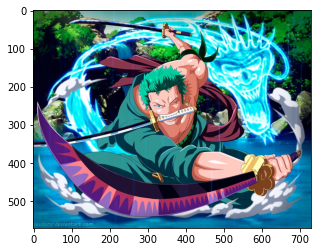

In [28]:
#Importing the first image that will be tested
new_img = cv2.imread('zoro.jpg')

#changing the color from bgr to rgb
image = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
plt.imshow(image)

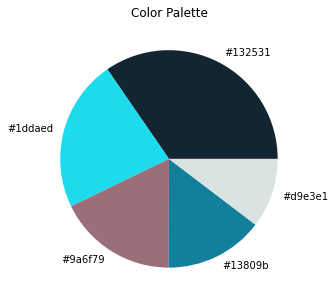

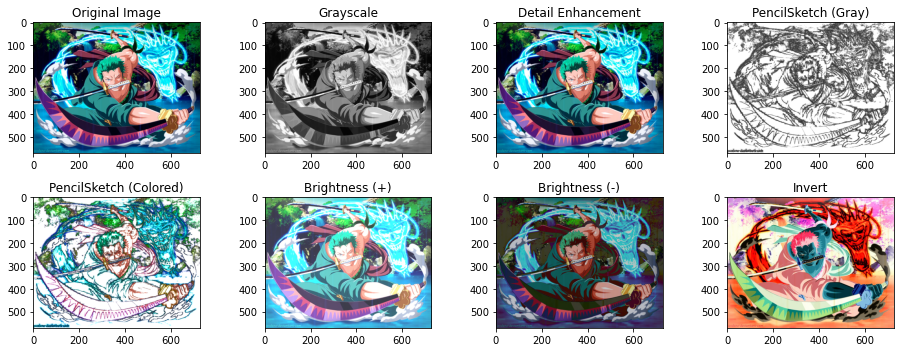

In [29]:
#Calling the functions that created in the previous cells. Values of some parameters can be changed based on your own desires.
#Filters range can be changed here.
grayscale_img = grayscale(image)
enhance_img = enhance(image,10,0.12)
pensketch_gray = pen_sketch_gray(image,90,0.07,0.1)
pensketch_colored = pen_sketch_colored(image,60,0.07,0.1)
bright_posimg = bright(image, 60)
bright_negimg = bright(image, -60)
invert_img = invert(image)

#Calling the color pallette generator
color_palette(image)

#Titles for each plot
titles = ['Original Image',"Grayscale","Detail Enhancement","PencilSketch (Gray)","PencilSketch (Colored)","Brightness (+)","Brightness (-)","Invert"]

#The plots created earlier are added inside the list
images = [image, grayscale_img, enhance_img, pensketch_gray, pensketch_colored, bright_posimg,bright_negimg, invert_img]

#Specifying the figure size
plt.figure(figsize=(13,5))

#Loop for calling all the plots in the list
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])

    #Used to automaticallly adjust the subplots
plt.tight_layout()

#Showing all the plots
plt.show()